In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers

df_train_path = '/kaggle/input/fruit-and-vegetable-image-recognition/train'
df_test_path = '/kaggle/input/fruit-and-vegetable-image-recognition/test'
df_val_path = '/kaggle/input/fruit-and-vegetable-image-recognition/validation'

#NOW setting the images size
img_width = 180
img_height = 180



In [6]:
df_train = tf.keras.utils.image_dataset_from_directory(
df_train_path,
shuffle=True,
image_size = (img_width,img_height),
batch_size = 32,
validation_split=False)


Found 3115 files belonging to 36 classes.


In [8]:
df_cat = df_train.class_names

df_val = tf.keras.utils.image_dataset_from_directory(df_val_path,
                                                    image_size=(img_height,img_width),
                                                    batch_size=32,
                                                    shuffle=False,
                                                    validation_split=False)


Found 351 files belonging to 36 classes.


In [9]:
df_test = tf.keras.utils.image_dataset_from_directory(df_test_path,
                                                    image_size=(img_height,img_width),
                                                    batch_size=32,
                                                    shuffle=False,
                                                    validation_split=False)

Found 359 files belonging to 36 classes.


NOW VISUALIZING THE IMAGES IN THE DATASET


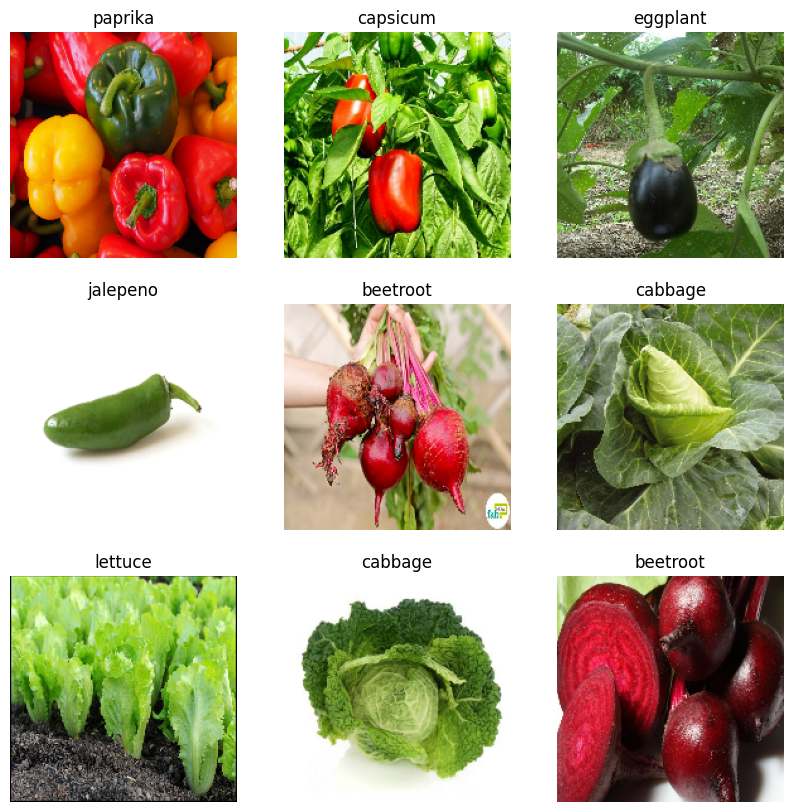

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image, labels in df_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(df_cat[labels[i]])
        plt.axis('off')

In [17]:
from tensorflow.keras import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units=len(df_cat))
    
    
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history= model.fit(df_train,validation_data = df_val,epochs=10)
model.summary()

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.0803 - loss: 3.8196 - val_accuracy: 0.3675 - val_loss: 2.3194
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3129 - loss: 2.4276 - val_accuracy: 0.6439 - val_loss: 1.3493
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5425 - loss: 1.6422 - val_accuracy: 0.8917 - val_loss: 0.5401
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8079 - loss: 0.7337 - val_accuracy: 0.9373 - val_loss: 0.4911
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9246 - loss: 0.3303 - val_accuracy: 0.9430 - val_loss: 0.4599
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9584 - loss: 0.2052 - val_accuracy: 0.9487 - val_loss: 0.3427
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9843 - loss: 0.1196 - val_accuracy: 0.9516 - val_loss: 0.3406
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9837 - loss: 0.1178 - val_accuracy: 0.9487 - v

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    16,588,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,851,470 (190.17 MB)

 Trainable params: 16,617,156 (63.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,234,314 (126.78 MB)

In [22]:
image = '/kaggle/input/garlic/garlic-the-super-cure-healthy-readers-9.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


predict = model.predict(img_bat)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [23]:
score = tf.nn.softmax(predict)
print('Vegetable/Fruit in this image is {} with an accuracy of {:0.2f}'.format(df_cat[np.argmax(score)],np.max(score)*100))

Vegetable/Fruit in this image is garlic with an accuracy of 100.00
